### PREVIEW OF RAW ACQUISITIONS

In [1]:
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
from find_nearest import find_nearest
import h5py
from read_funcs import make_rgb_dc,Landsat_cube,RGB_Landsat,read_prs_l2d
from matplotlib_scalebar.scalebar import ScaleBar
from cd_funcs import cva,c2va,diffs
from img_list import use_cases

### Po River PRISMA

The first acquisition is located at Lat,Lon [ 45.1633 , 10.792 ] and the second at Lat,Lon [ 45.165 , 10.7921 ].

In [2]:
#initialization parameterss
use_case='Po_01'
path_l2d = '../DATABASE/'
tstart1=use_cases[use_case][0][0][1]
tend1=use_cases[use_case][0][0][2]
tstart2=use_cases[use_case][0][1][1]
tend2=use_cases[use_case][0][1][2]
name_case_study=use_case

In [3]:
y1, x1, vwl1, swl1, vrf1, srf1, info1 = read_prs_l2d(path_l2d, tstart1, tend1)
y2, x2, vwl2, swl2, vrf2, srf2, info2 = read_prs_l2d(path_l2d, tstart2, tend2)
print("image key 1: "+str(info1['img_id'])+"\nimage key 2: "+str(info2['img_id']))

image key 1: 9409
image key 2: 30245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


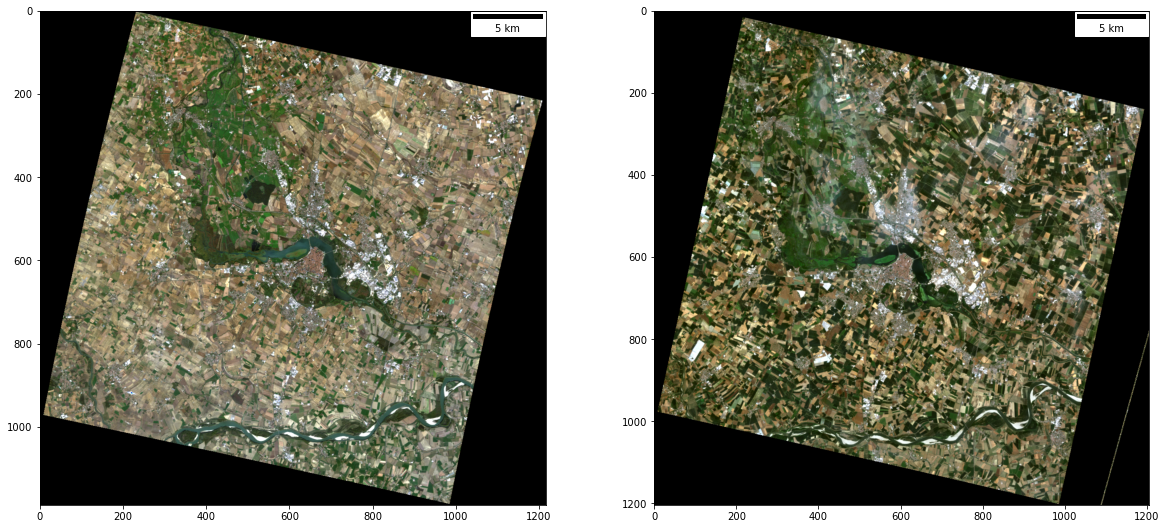

In [4]:
#plot coregistered input data
rgb1 = make_rgb_dc(vrf1,vwl1)
rgb2 = make_rgb_dc(vrf2,vwl1)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(rgb1)
scalebar = ScaleBar(30) # 1 pixel = 30 meter
plt.gca().add_artist(scalebar)

plt.subplot(2,2,2)
plt.imshow(rgb2)
scalebar = ScaleBar(30)
plt.gca().add_artist(scalebar)

### Po river Landsat

Short description of use case N° 3

In [5]:
#initialization parameterss
use_case='Land_Po_01'
tstart1=use_cases[use_case][0][0][1]
tend1=use_cases[use_case][0][0][2]
tstart2=use_cases[use_case][0][1][1]
tend2=use_cases[use_case][0][1][2]
name_case_study=use_case

In [6]:
#build Landsat wavelength vector using central bands
vwl1 = np.array([433, 482, 562, 655, 865, 1610, 2200, 10800])
L_bands=np.array(['01', '02', '03', '04', '05', '06', '07', '10'])
t1=Landsat_cube(path_l2d,tstart1,tend1,L_bands)
t2=Landsat_cube(path_l2d,tstart2,tend2,L_bands)
R_idx=find_nearest(vwl1,640)
G_idx=find_nearest(vwl1,560)
B_idx=find_nearest(vwl1,480)

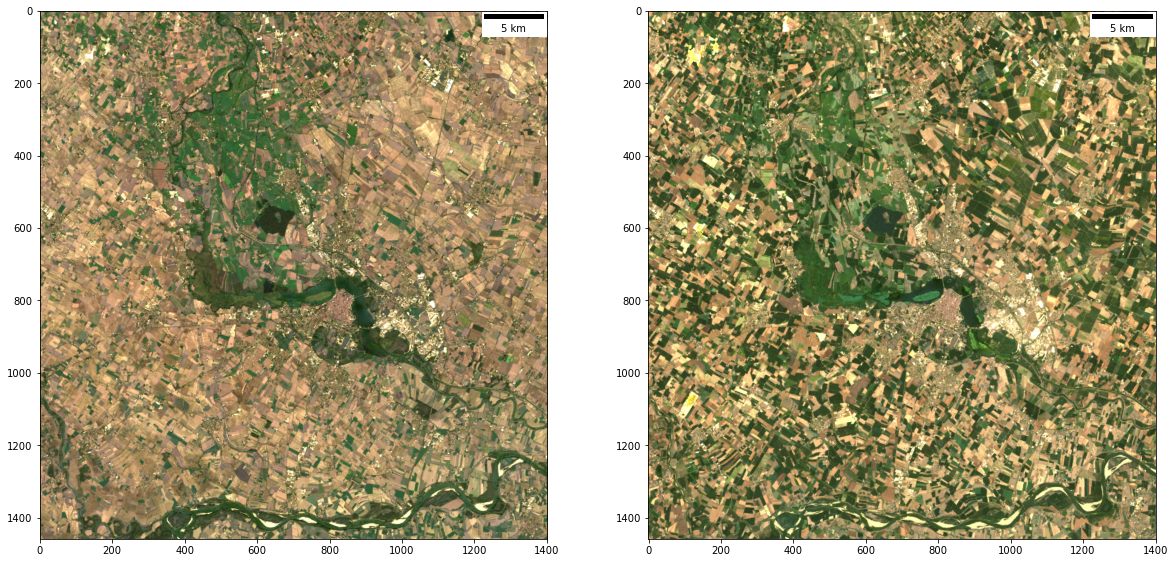

In [10]:
#plot coregistered input data
rgb1 = RGB_Landsat(t1,R_idx,G_idx,B_idx)
rgb2 = RGB_Landsat(t2,R_idx,G_idx,B_idx)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
#uncomment if histogram stretch is needed (enhance image contrast accorsingly to the histogram of the reflectance values)
threshold=0.18
rgb1[rgb1>threshold]=threshold
rgb1=rgb1/threshold
plt.imshow(rgb1)
scalebar = ScaleBar(30)
plt.gca().add_artist(scalebar)
plt.subplot(1,2,2)
#uncomment if histogram stretch is needed (enhance image contrast accorsingly to the histogram of the reflectance values)
threshold=0.18
rgb2[rgb2>threshold]=threshold
rgb2=rgb2/threshold
plt.imshow(rgb2)
scalebar = ScaleBar(30)
plt.gca().add_artist(scalebar)